In [31]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Daily Challenge: Logistic Regression For Admission Prediction

## Data Exploration: Load and visualize the data.
Use pandas to load the dataset and examine the first few rows.

Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

In [33]:
columns = ['exam_1', 'exam_2', 'admission']
df = pd.read_csv(r'/content/ex2data1.txt', names=columns, na_values=" ?", skipinitialspace=True)

In [34]:
df.head()

,exam_1,exam_2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


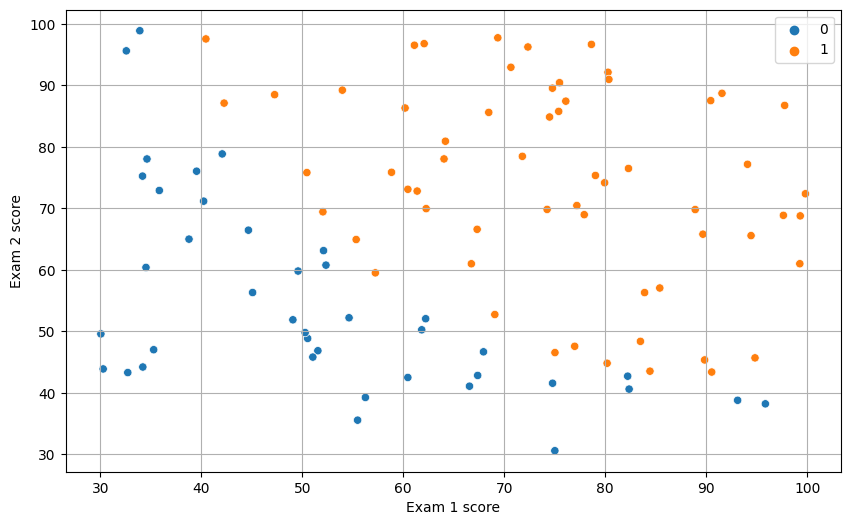

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="exam_1", y="exam_2", hue="admission")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid(True)

## Applying Logistic Regression with scikit-learn:
Implement logistic regression using the LogisticRegression function from scikit-learn to find the best parameters for your model.

Train the logistic regression model on your dataset.

In [46]:
# Prepare the data
X = df[['exam_1', 'exam_2']]
y = df['admission']

In [48]:
# Create a logistic regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(X)
model = sm.MNLogit(y,X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:              admission   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.6976
Time:                        13:04:51   Log-Likelihood:                -20.350
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                 4.067e-21
admission=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -25.1613      5.799     -4.339      0.000     -36.526     -13.796
exam_1          0.2062    

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

# we use .ravel() to transform the y_train data into a
# 1D array because LogisticRegression() expects the target
# variable (in this case, y_train) to be a 1D array rather than a column vector or a 2D array.
model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

## Making Predictions:
Use the trained logistic regression model to make predictions on your dataset.
Calculate the accuracy of your model.

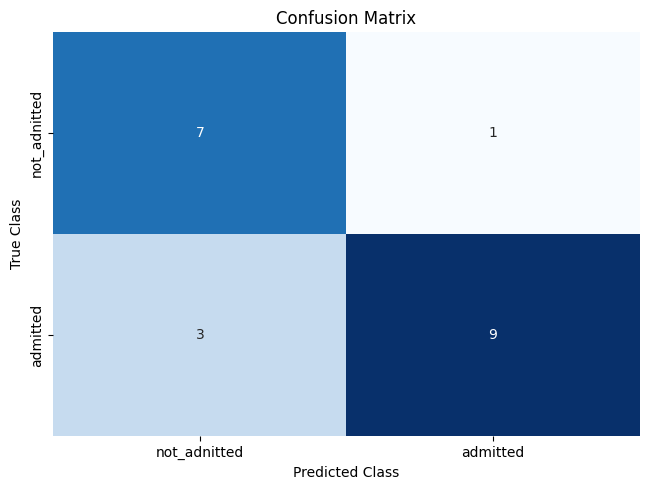

In [63]:
from sklearn.metrics import confusion_matrix

class_names = ['not_adnitted', 'admitted']
matrix = confusion_matrix(y_test, pred)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [64]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.75
F1 Score for Logistic Regression Model 1 : 0.82


## Model Evaluation:
Interpret the result of logistic regression and the accuracy of your model.

Let's break down the interpretation:

- **Coefficients:**

const: -25.1613
exam_1: 0.2062
exam_2: 0.2015

The constant term (-25.1613) is the log-odds of admission when both exam_1 and exam_2 are zero.
For a one-unit increase in exam_1, the log-odds of admission increase by 0.2062.
For a one-unit increase in exam_2, the log-odds of admission increase by 0.2015.
Positive coefficients for exam_1 and exam_2 suggest that higher scores in these exams are associated with a higher likelihood of admission.

- **P-values:**

The p-values associated with each coefficient indicate whether the coefficients are statistically significant. In this case, the p-values are very close to zero (0.000), suggesting that all coefficients are statistically significant.

- **Confidence Intervals (95%):**

For each coefficient, the 95% confidence interval is provided ([0.025, 0.975]). This interval gives a range in which we can be 95% confident that the true population parameter lies.

- **Sensitivity/Recall:**

Sensitivity (or recall) is a measure of the proportion of actual positive cases that were correctly identified by the model. In this case, it is given as 0.75, which means the model correctly identified 75% of the actual positive cases.

- **F1 Score:**

The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1 score indicates a better balance between precision and recall. In this case, it is given as 0.82.

In summary, the logistic regression model suggests that higher scores in exam_1 and exam_2 are associated with a higher likelihood of admission. The model appears to perform reasonably well based on the provided sensitivity and F1 score.